# One Variable Linear Regression

## Goal

We're given a dataset that has x and y. Example:

| x | y |
|---|---|
| 1 | 12 |
| 5 | 35 |
| 8 | 48 |
| 32 | 132 |

Now we want to fit the best variable linear regression for the given data. Model:

$$ f_{w,b}(x^{(i)}) = w x^{(i)} + b $$


## Definitions

We have **m** number of data, to train our model with.

For i_th data point, we show the cordinator of the data with: $x^{(i)}$ and $y^{(i)}$

*Cost Function (J)* shows us how accurate our model is. The closer to the zero, the better.


## Solution

Cost function is square of variance which is equal to:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

Note: the reason the cost function is divided by two is that, later when we take derivative of the cost function, we get a simpler function (without an extra 2). 

Now we start from an initia w and b, and using this formula we find our next w, b. We continue doing it for number of times (for example 1,000 times). $\alpha$ is our step length that we take each time. The lower the $\alpha$ the more accurate step we take, but we need to take more steps to get to the ideal result. 


$$ w = w - \alpha \frac{\partial J(w,b)}{\partial w} $$
$$ b = b - \alpha \frac{\partial J(w,b)}{\partial b} $$


Now we need to find the partial derivatives. 

For w:
$$ \frac{\partial J}{\partial w} = \frac{\partial}{\partial w} (\frac{1}{2m} \sum_{i=1}^{m} ((w x^{(i)} + b - y^{(i)}) ^ 2)$$

$$\frac{\partial J}{\partial w} = \frac {1}{m} \sum_{i=1}^{m} ((w x^{(i)} + b - y^{(i)}) x^{(i)})$$

Finally by replacing the $f_{w,b}(x^{(i)})$ we get:
$$ \Rightarrow \frac{\partial J}{\partial w} = \frac {1}{m} \sum_{i=1}^{m} ((f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)})$$

Using the same method for b we get:

$$\Rightarrow \frac{\partial J}{\partial b} = \frac {1}{m} \sum_{i=1}^{m}((f_{w,b}(x^{(i)}) - y^{(i)})$$

## Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def compute_cost(x_train, y_train, w, b): 
    m = x_train.shape[0]
    
    f_wb = w * x_train + b
    error = (f_wb - y_train) ** 2
    cost = np.sum(error) / (2 * m)
    
    return cost

In [4]:
def compute_gradient(x_train, y_train, w, b):
    m = x_train.shape[0]
    f_wb = w * x_train + b
    # Note: Using built in function of numpy, we get way better performance due parallel processing
    error = f_wb - y_train
    
    dj_dw = np.dot(error, x_train) / m
    dj_db = np.sum(error) / m
    
    return dj_dw, dj_db

In [46]:
def fit_regression(x_train, y_train, initial_w, initial_b, alpha, iterations, record_step):
    w = initial_w
    b = initial_b
    J_history = []
    for iteration in range (iterations):
        # Save iteration after x steps
        if (iteration % record_step == 0):
            J_history.append(compute_cost(x_train, y_train, w, b))
            
        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
        
        # Calculating the next value for our w and b:
        w -= alpha * dj_dw
        b -= alpha * dj_db
    
    return w, b, J_history

In [49]:
# Record step defines after how many iteration, we should save J, so we can get the learning curve
def run_linear_regression(x_train, y_train, alpha, iterations, record_step=100):
    w, b, J_history = fit_regression(x_train, y_train, 3.0, 13.0, alpha, iterations, record_step)

    cost = compute_cost(x_train, y_train, w, b)
    print(f"w: {w}, b: {b}, alpha: {alpha}, iterations:{iterations}, cost: {cost}")

    # Create another plot under the currect plot for J_wb / iterations
    plt.figure(figsize=(8, 10))

    # Plot the points
    plt.subplot(2, 1, 1)
    plt.scatter(x_train, y_train, label='Data Points')

    # Plot the linear regression line
    x_range = np.linspace(min(x_train), max(x_train), 100) # List of 100 points in our x range
    y_range = w * x_range + b

    plt.plot(x_range, y_range, color='red', label=f'Linear Regression: w={w:.2f}, b={b:.2f}')

    # Add labels
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    # Plot Learning Curve (cost per iteration) Function
    plt.subplot(2, 1, 2)
    iteration = np.arange(0, iterations, record_step)
    J_history = np.array(J_history)
    plt.plot(iteration, J_history, color='blue', label='J Per Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Cost function')
    plt.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

w: 3.719195585185385, b: 13.033813377489897, alpha: 1e-05, iterations:1000, cost: 7.640392410625026


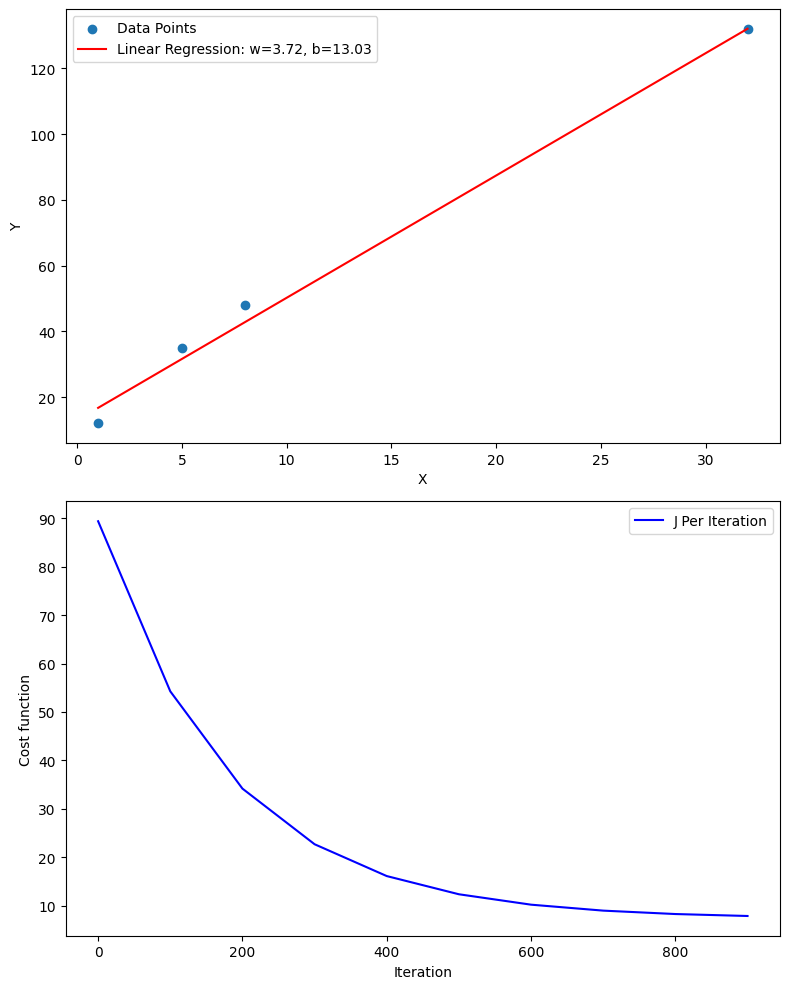

In [50]:
x_train = np.array([1.0, 5.0, 8.0, 32.0])
y_train = np.array([12.0, 35.0, 48.0, 132.0])

run_linear_regression(x_train, y_train, alpha=1.0e-5, iterations= 1_000, record_step=100)

## Learning Curve

The second plot is called a learning curve. With learning curve we can see if our code is working correctly and our chosen value for alpha is correct. A good learning curve, always decrease and at the end it stops decreasing and gradually gets flat.

If chosen alpha, is very big, our learning curve doesn't decrease as you can see in the following plot:

w: -2.1107805569194406e+24, b: -8.732407575902439e+22, alpha: 1.0, iterations:10, cost: 6.225372077077075e+50


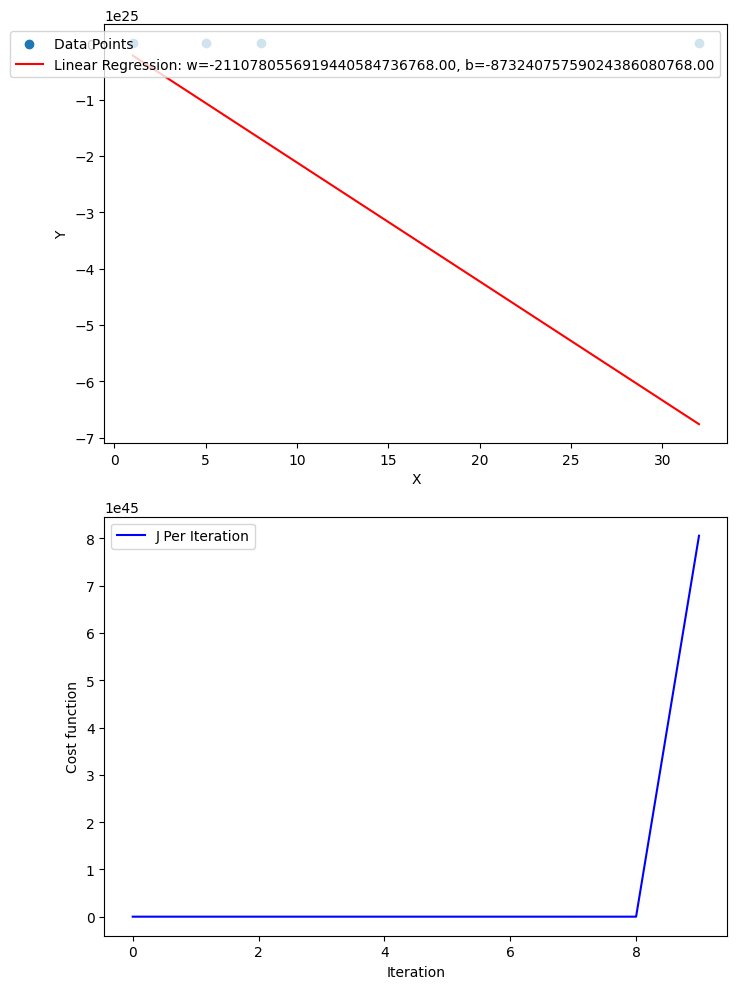

In [55]:
x_train = np.array([1.0, 5.0, 8.0, 32.0])
y_train = np.array([12.0, 35.0, 48.0, 132.0])

run_linear_regression(x_train, y_train, alpha=1.0, iterations= 10, record_step=1)

If learning curve is super small, it takes a lot more iterations to get to the correct regression values, and it doesn't get flat at the end:
